# Heart Prediction Model

## Miscellanous: Importing Libraries

In [374]:
# Import libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. Getting and Loading the data.

In [375]:
# 1. Getting and Loading the dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [376]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 2. Exploring and processing the data / Feature-Engineering

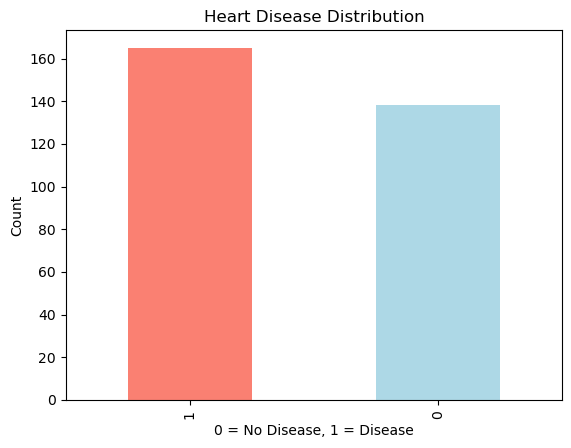

In [377]:
#  plotting the data to see the distribution for the presence of heart disease
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Heart Disease Distribution')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.show()

In [378]:
# checking of data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Legend of the data columns

In [379]:
# age = age of the patient
# sex = patient's gender, 1 for male 0 for female
# cp = chest pain type, 0: Typical angina 1: Atypical angina 2: Non-anginal pain 3: Asymptomatic
# trestbps = resting blood pressure (in mm Hg)
# chol = serum cholestoral in mg/dl
# fbs = fasting blood sugar > 120 mg/dl
# restecg = resting electrocardiographic results, 0: Normal 1: ST-T wave abnormality 2: Left ventricular hypertrophy
# thalach = maximum heart rate achieved
# exang = exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# slope = the slope of the peak exercise ST segment, 0: Upsloping 1: Flat 2: Downsloping
# ca = number of major vessels (0-3) colored by flourosopy
# thal = 1 = normal; 2 = fixed defect; 3 = reversable defect
# target = 1 if the patient has heart disease, 0 if not


### To check if feature engineering is required if there are any missing values.

In [380]:
# to check if any columns have missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [381]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### To check the correlations between the 'target' column (the column we want to predict) and the other columns

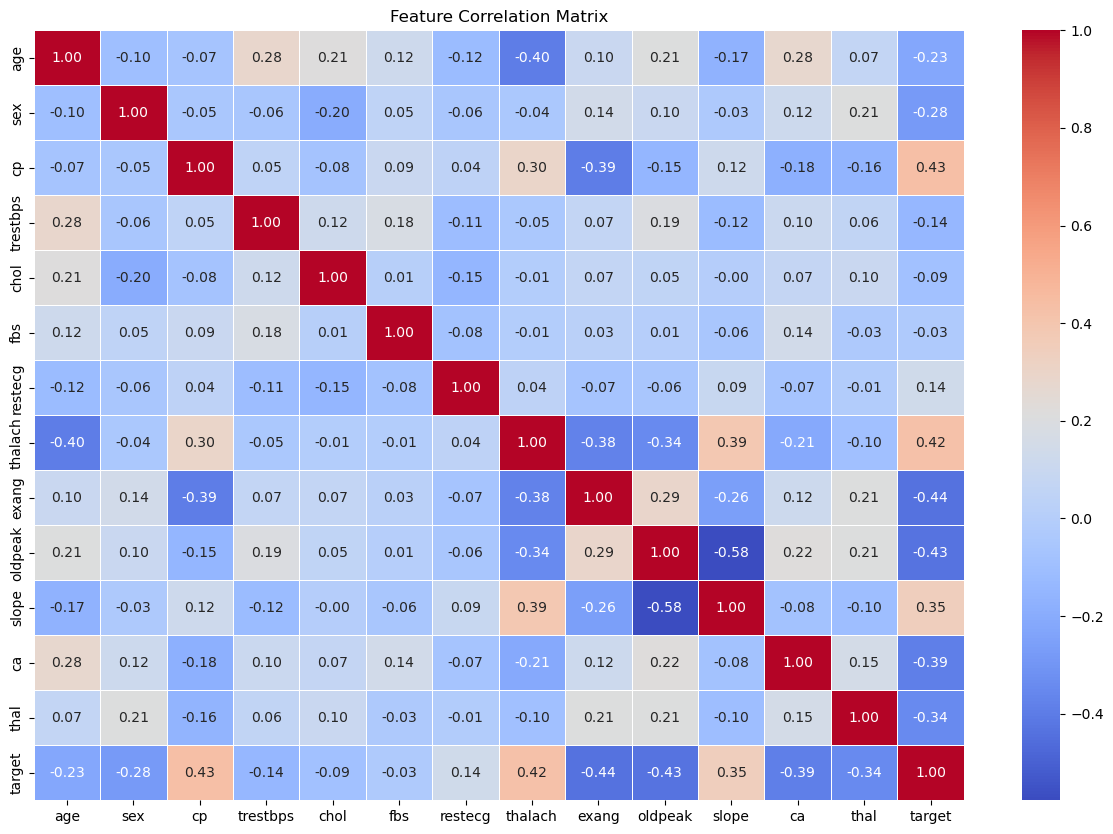

In [382]:
# check the correlation between the columns
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

**1. It shows that Resting Blood Pressure and Cholesterol have a weak correlation with the target variable**

**2. It also shows that there strong correlation between chest pain type and the target variable**

## 3. Shuffling the data

In [383]:
# drop redundant columns
df = df.drop(['fbs', 'restecg'], axis=1)


### Doing One Hot-Encoding (OHE). Changes our categorical data columns into binaries, making it easier for our machine to understand.

In [384]:
# Do One-Hot Encoding for cp and thal columns
df = pd.get_dummies(df, columns=['cp', 'thal', 'slope'])

In [385]:
df

,age,sex,trestbps,chol,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,123,1,0.2,0,0,1,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,132,0,1.2,0,0,0,0,0,1,0,0,0,1,0,1,0
300,68,1,144,193,141,0,3.4,2,0,1,0,0,0,0,0,0,1,0,1,0
301,57,1,130,131,115,1,1.2,1,0,1,0,0,0,0,0,0,1,0,1,0


## 4 & 5. Splitting the dataset & Setting Model Hyper-parameters

In [386]:
# target is our prediction column
x = df.drop('target', axis=1).to_numpy()
y = df['target'].to_numpy()

# split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## 6 & 7. Training the model & Evaluating the model

In [387]:
# importing neccessary libraries for the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# To ensure that the columns are in the same order when passing data through np arrays
feature_names = ['age', 'sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2']
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# List of models we are using for training
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)),
    ("Linear Discriminant", LinearDiscriminantAnalysis()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Logistic Regressor", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=3))
]

# To store the model accuraccies
model_accuracies = {}

# Fit models and calculate accuracy
for name, model in models:
    # Train the model
    model.fit(X_train_df, y_train)
    
    # Make predictions on the test set
    test_predictions = model.predict(X_test_df)
    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Store the model accuracy
    model_accuracies[name] = test_accuracy  
    
    # Print the accuracy score
    print(f"{name} Accuracy: {test_accuracy:.2%}")


# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = [model for name, model in models if name == best_model_name][0]

print(f"\nBest Model: {best_model_name} with Accuracy: {model_accuracies[best_model_name]:.2%}")




Random Forest Accuracy: 90.16%
Linear Discriminant Accuracy: 90.16%
Decision Tree Accuracy: 83.61%
Logistic Regressor Accuracy: 90.16%
Naive Bayes Accuracy: 91.80%
K-Nearest Neighbors Accuracy: 72.13%

Best Model: Naive Bayes with Accuracy: 91.80%


c:\Users\brosf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 8. Using the model for prediction, importing the model to external python file.

In [388]:
# To save the model, then importing it under heart.py
import joblib
joblib.dump(best_model, 'heart_model.pkl')
print('Model has saved successfully !')

Model has saved successfully !


### Just to test the model.

In [389]:
# FOR TESTING THE MODEL
# Columns = age, sex, trestbps, chol, thalach, exang, oldpeak, ca, cp_0, cp_1, cp_2, cp_3, thal_0, thal_1, thal_2, thal_3, slope_0, slope_1, slope_2
clf = (20, 1, 120, 200, 145, 0, 2.5, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0)
clf = np.asarray(clf)
clf = clf.reshape(1, -1)
predict = best_model.predict(clf)
print(f'Prediction: {predict}')

if predict == 1:
    print('This person has heart disease.')
else:
    print('This person does not have heart disease.')

Prediction: [0]
This person does not have heart disease.


c:\Users\brosf\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
